#### Exploratory Data Analysis 

Initial exploratory data analysis to understand the provided dataset.

In [1]:
# Importing Libraries

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns   
import numpy as np

In [12]:
print(f'The shape of the data is {data.shape}')

The shape of the data is (60000, 171)


In [33]:
# Inspecting the amount of missing values in the dataset.

data = data.replace('na', np.nan) # Replacing 'na' with np.nan
print(data.isnull().sum().sort_values(ascending=False).head(20)) # Displaying the top 20 columns with missing values

class     60000
br_000    49264
bq_000    48722
bp_000    47740
bo_000    46333
ab_000    46329
cr_000    46329
bn_000    44009
bm_000    39549
bl_000    27277
bk_000    23034
ch_000    14861
cf_000    14861
cg_000    14861
co_000    14861
ad_000    14861
db_000    13808
da_000    13808
cz_000    13808
cy_000    13808
dtype: int64


In [34]:
# Inspecting the split of the target variable.
print(data['class'].value_counts())
print(data['class'].value_counts(normalize=True))

Series([], Name: count, dtype: int64)
Series([], Name: proportion, dtype: float64)


In [ ]:
data.describe(include='all')


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,6.000000e+04,13671,56665,45139,57500,57500,59329,59329,59329,...,59329,59329,59329,59329,59329,59329,59329,59329,57276,57277
unique,2,NaN,29,2061,1886,333,418,154,617,2422,...,34488,31711,35188,36288,31795,30469,24213,9724,28,49
top,neg,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,59000,NaN,10977,8752,2009,55543,55476,59133,58587,56181,...,1364,1557,1797,2814,4458,7898,17280,31863,57021,56794
mean,NaN,5.933650e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.454301e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,8.340000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.077600e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.866800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Changing all the columns to numeric values.

data['class'] = data['class'].map({'pos': 1, 'neg': 0}) # Changing the target variable to binary values

In [37]:
data = data.astype('float64') # Changing all the columns to float64 type

This split is extremely biased towards the negative class. 

In [21]:
# Removing null values from the dataset.
data_cleaned = data.dropna(axis=0, how='any') # Dropping rows with any null values

print(f'The shape of the cleaned data is {data_cleaned.shape}')
print(data_cleaned.isnull().sum().to_list())
print(data_cleaned['class'].value_counts())
print(data_cleaned['class'].value_counts(normalize=True))

The shape of the cleaned data is (591, 171)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
class
neg    515
pos     76
Name: count, dtype: int64
class
neg    0.871404
pos    0.128596
Name: proportion, dtype: float64


After removing the null values, this has led to a ver

<Axes: >

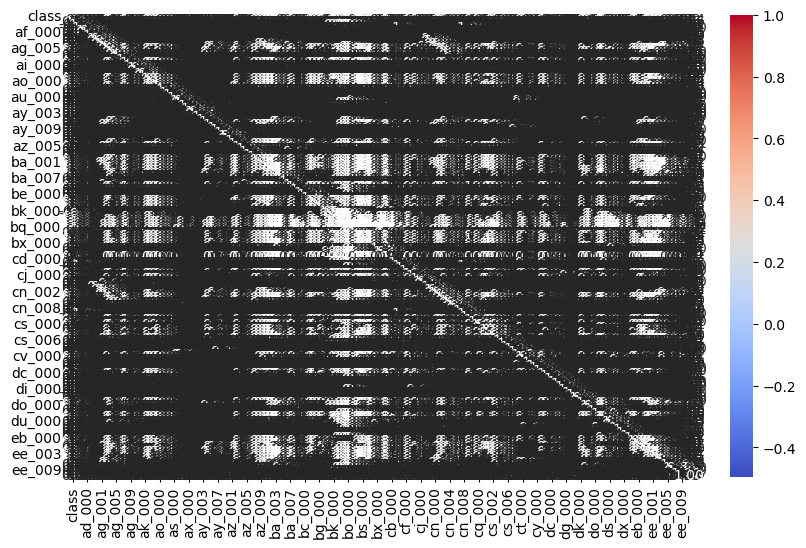

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', ax=ax)

Text(0.5, 1.0, 'Sensor 1 Distribution by Class')

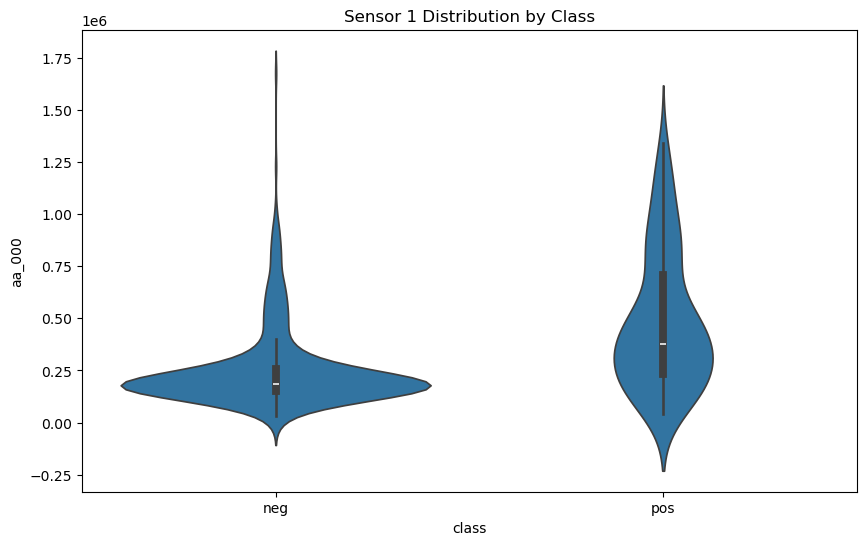

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(x='class', y='aa_000', data=data_cleaned, ax=ax)
plt.title('Sensor 1 Distribution by Class')

To reduce the number of features to initially inspect, the inspection will take place on the top 10 features with the maximum missing values.

In [43]:
Top_Cols_Missing_Data = (data.isnull().sum().sort_values(ascending=False).head(20)).index
Top_Cols_Missing_Data

Index(['class', 'br_000', 'bq_000', 'bp_000', 'bo_000', 'ab_000', 'cr_000',
       'bn_000', 'bm_000', 'bl_000', 'bk_000', 'ch_000', 'cf_000', 'cg_000',
       'co_000', 'ad_000', 'db_000', 'da_000', 'cz_000', 'cy_000'],
      dtype='object')

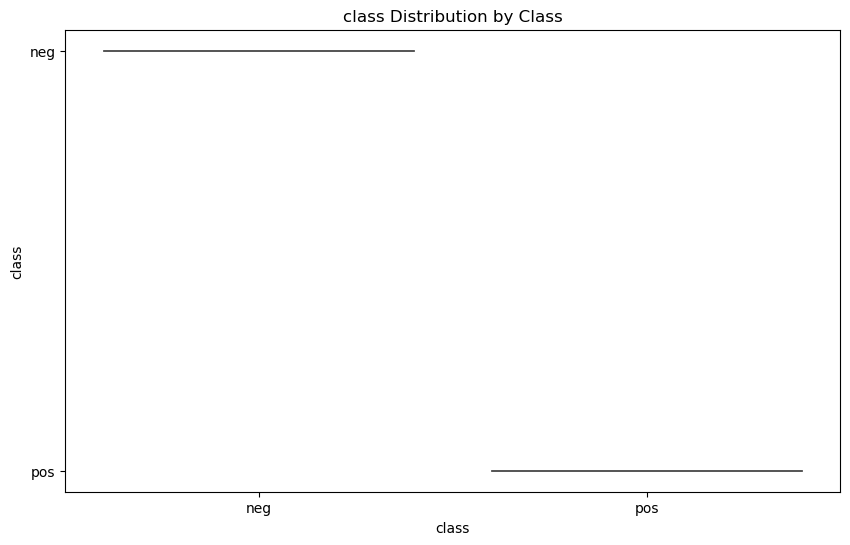

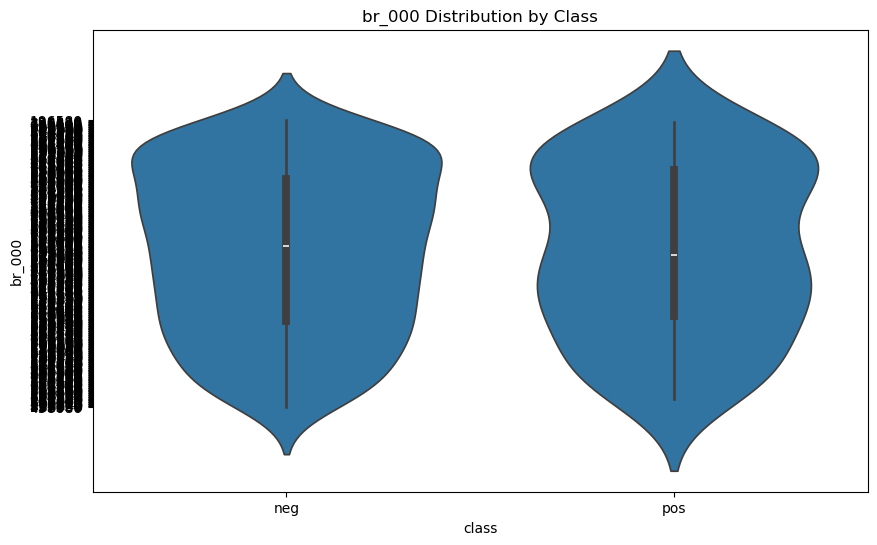

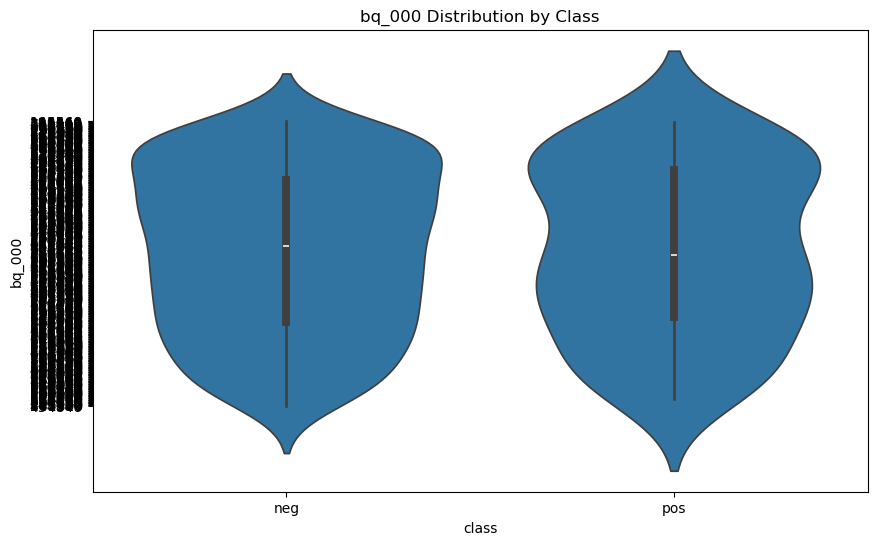

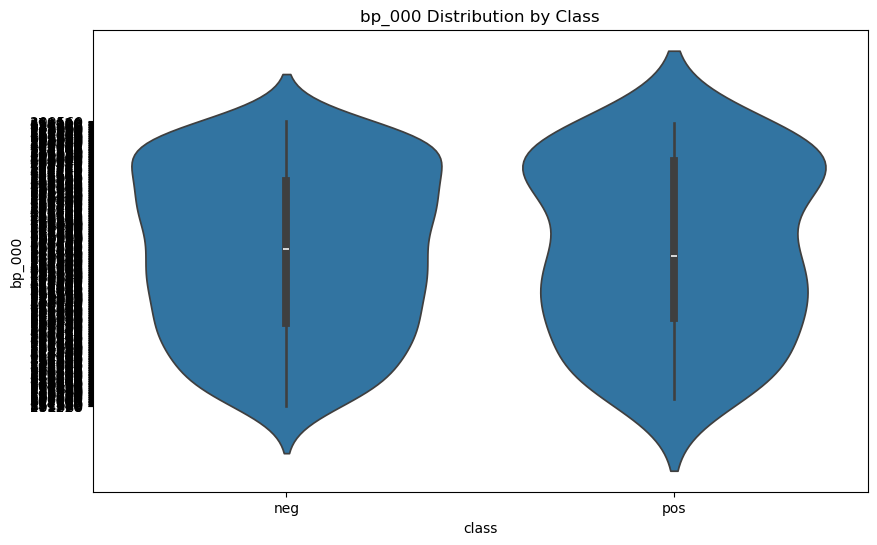

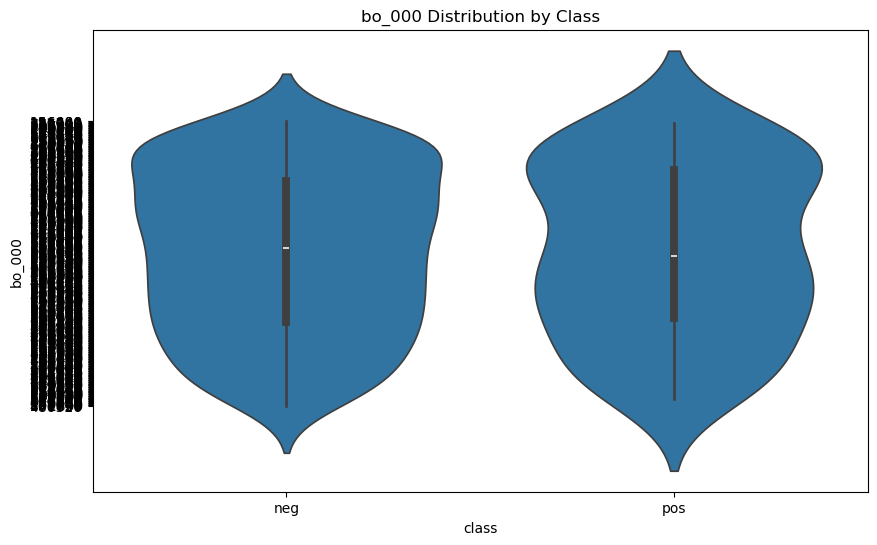

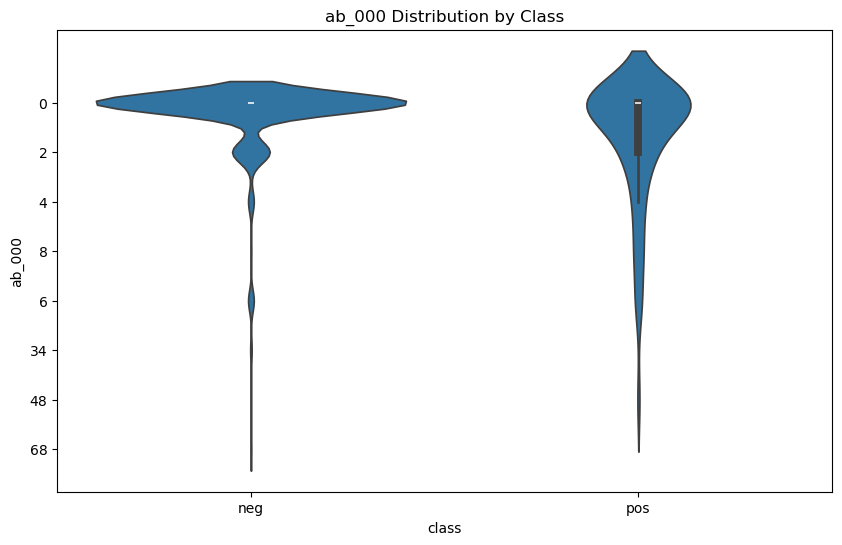

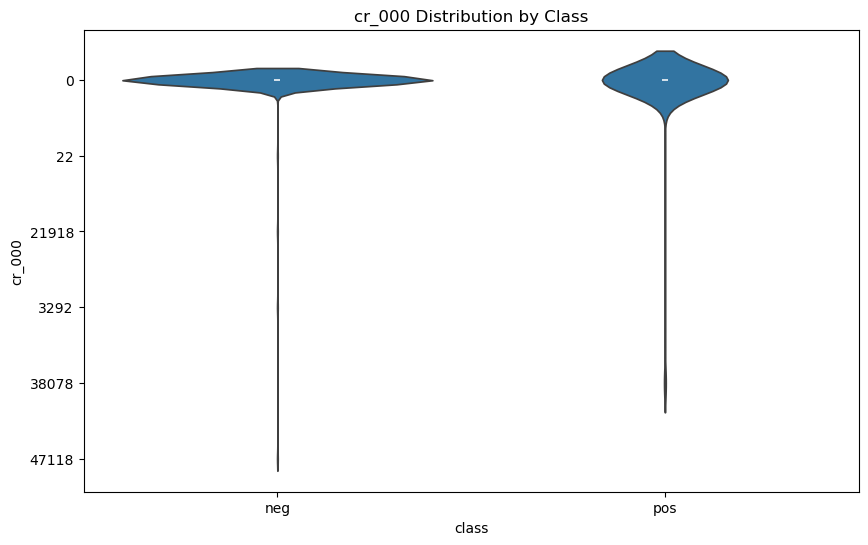

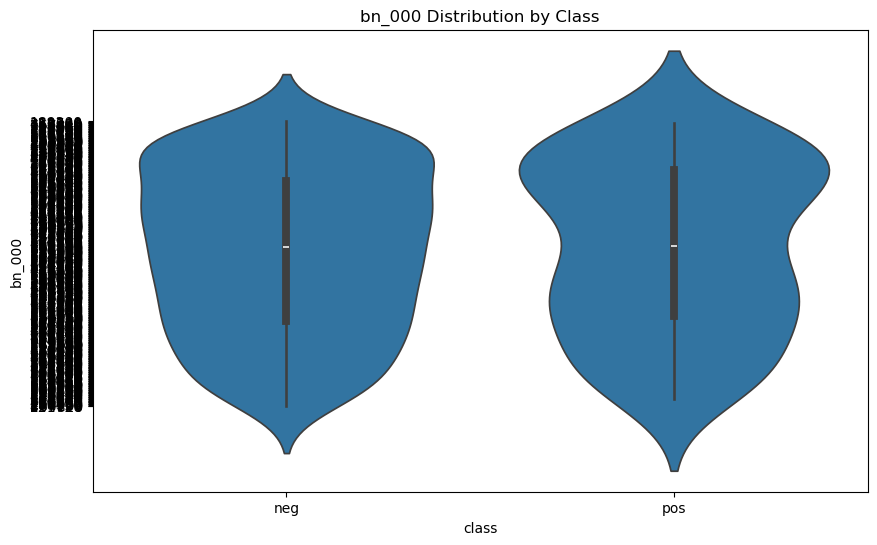

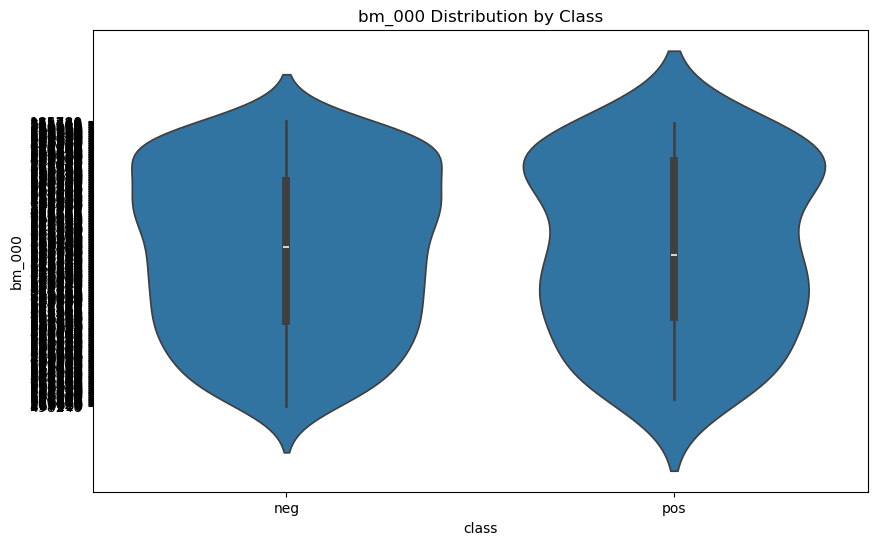

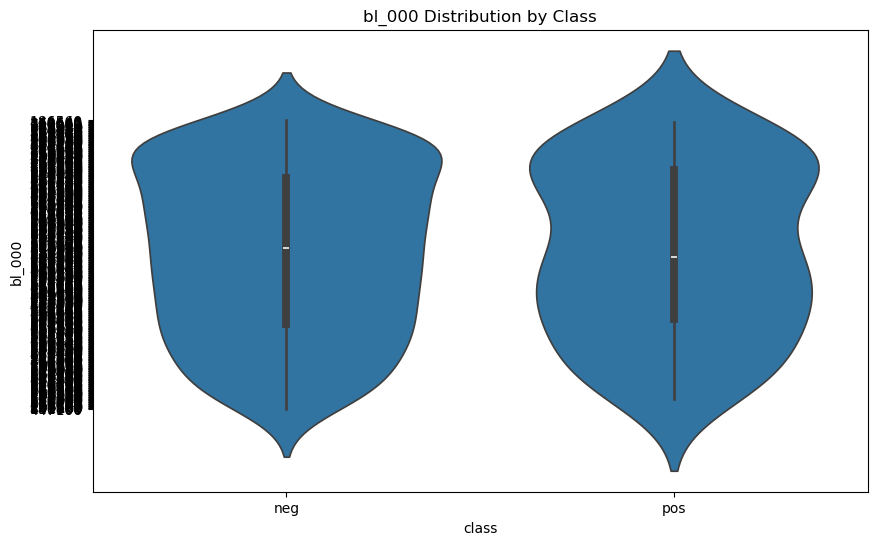

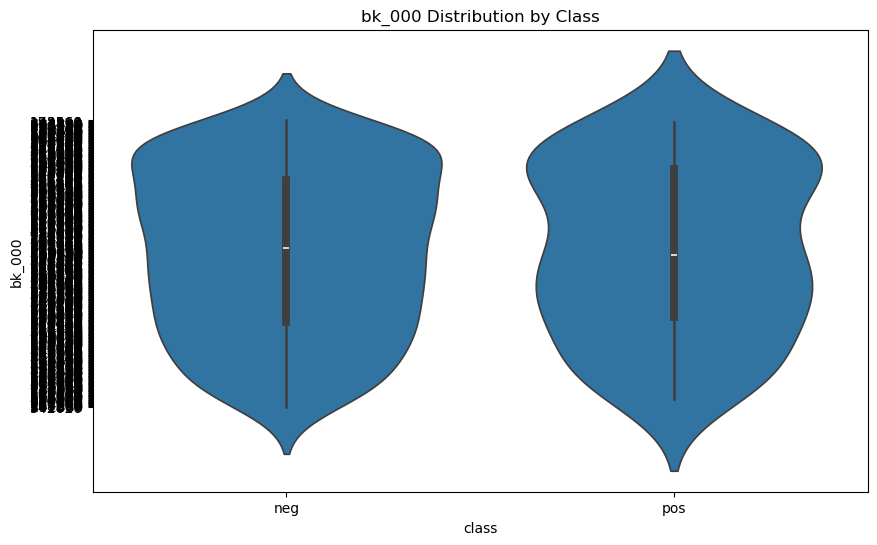

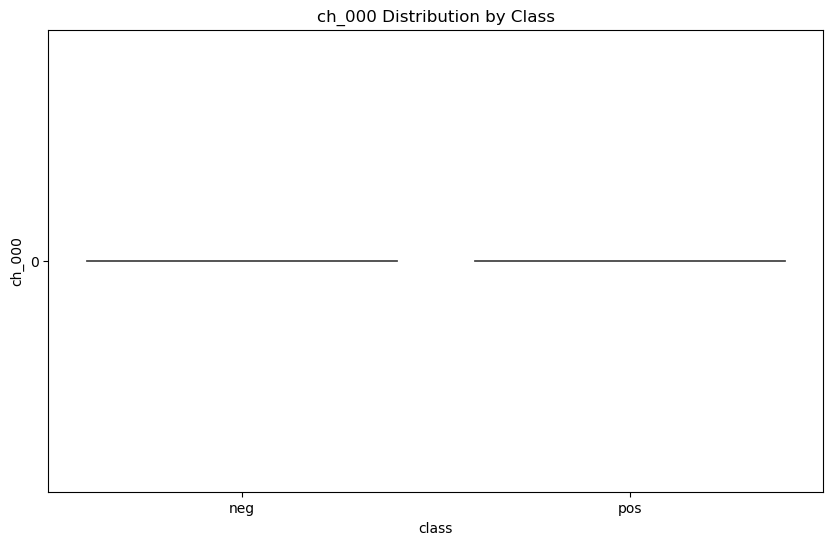

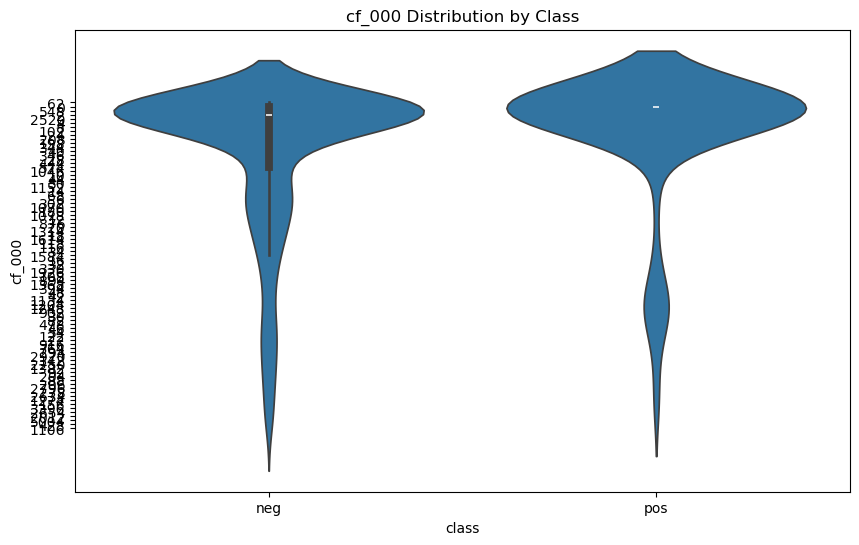

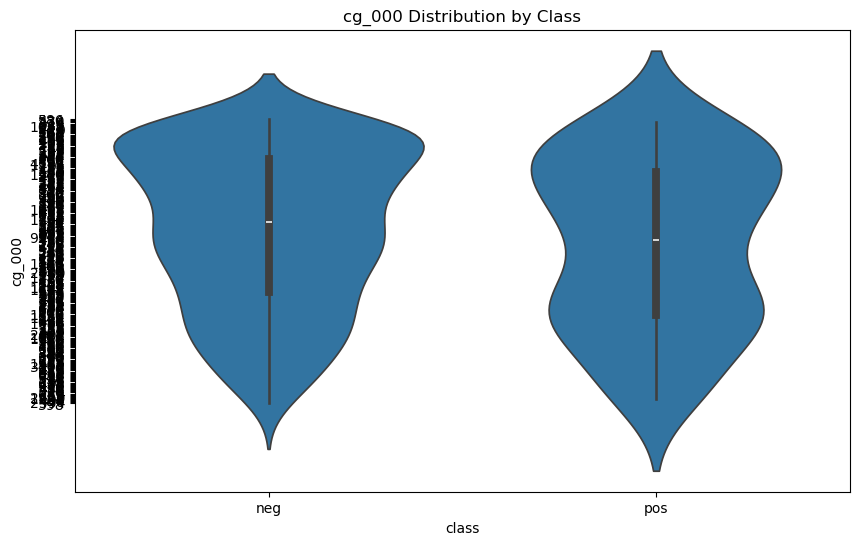

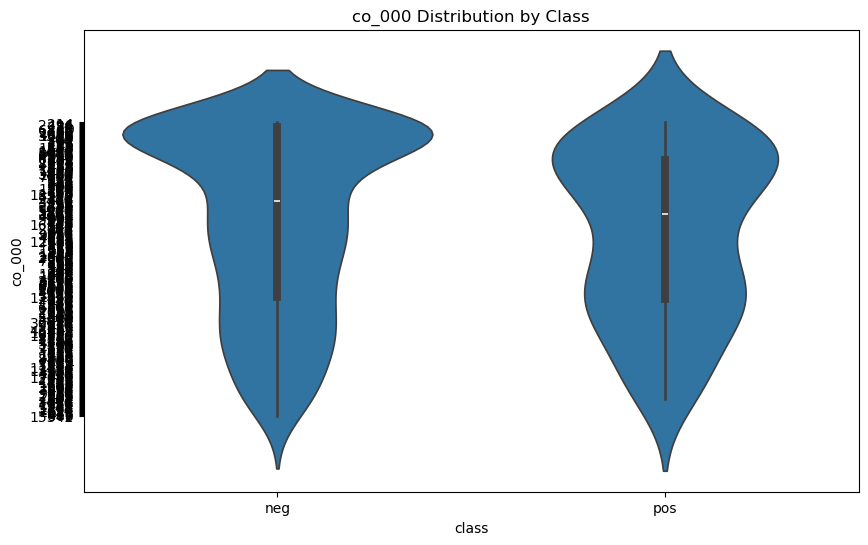

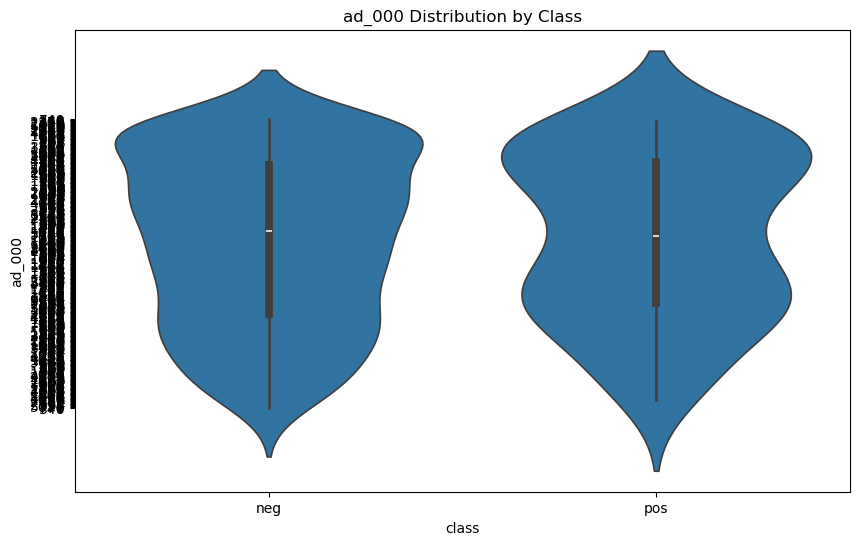

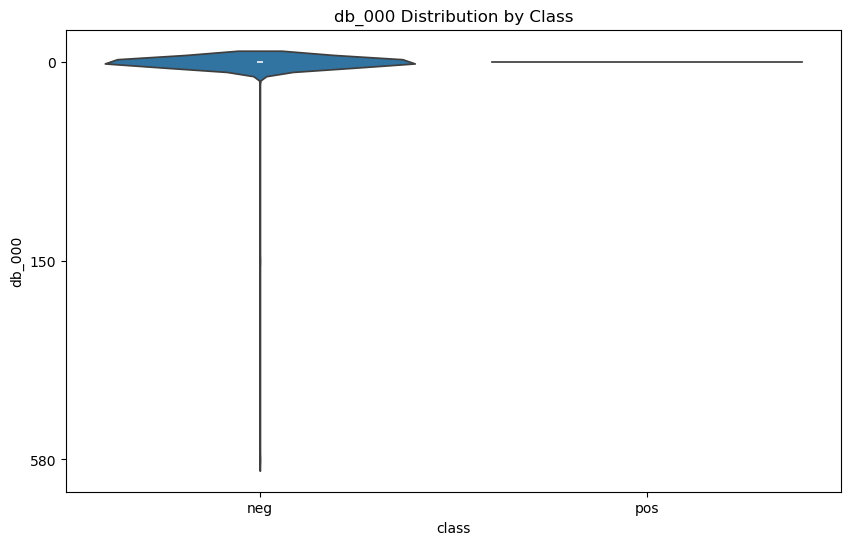

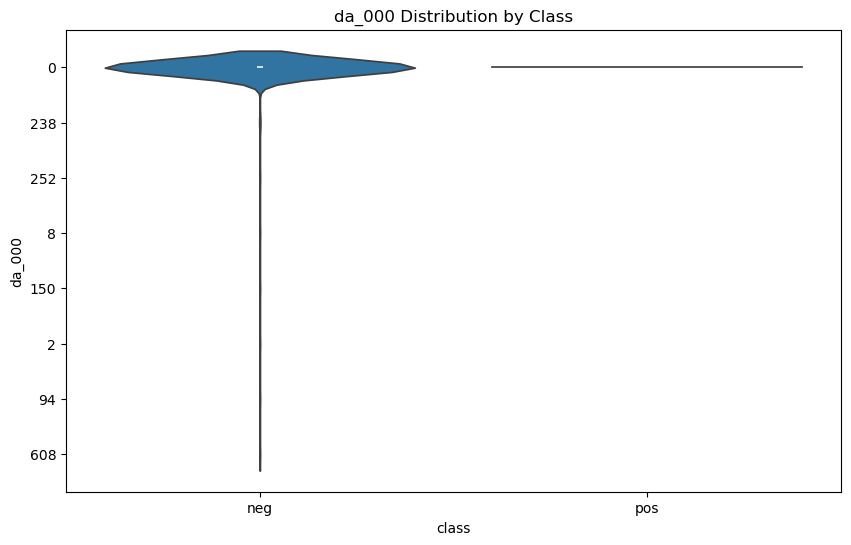

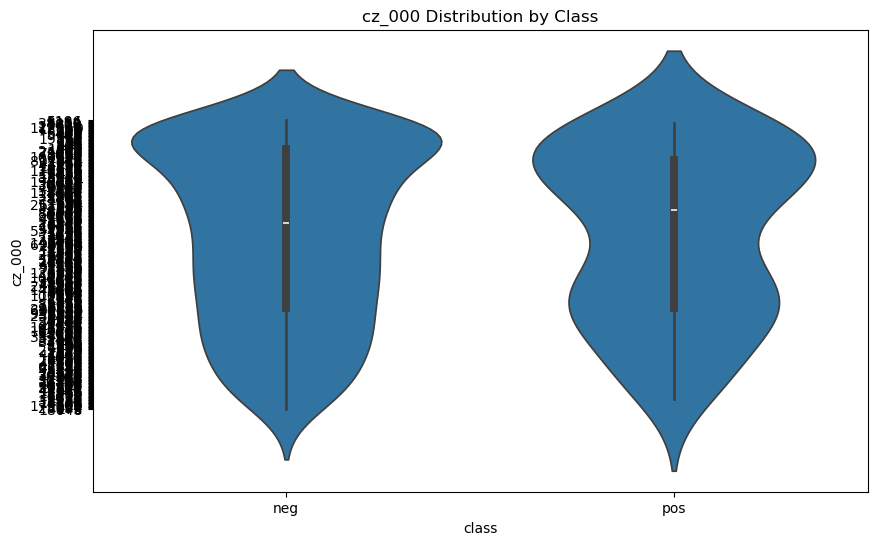

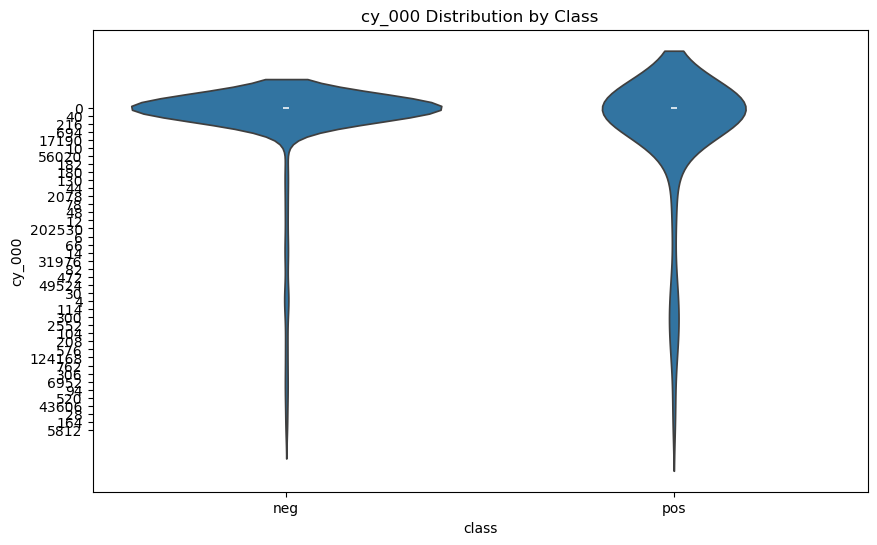

In [44]:
for col in Top_Cols_Missing_Data:
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.violinplot(x='class', y=col, data=data_cleaned, ax=ax)
    plt.title(f'{col} Distribution by Class')
    plt.show()

In [50]:
def CleanData(data):
    data = data.replace('na', np.nan) # Replacing 'na' with np.nan
    # data = data.dropna(axis=0, how='any') # Dropping rows with any null values
    data['class'] = data['class'].map({'pos': 1, 'neg': 0}) # Changing the target variable to binary values
    data = data.astype('float64') # Changing all the columns to float64 type
    return data



In [52]:
TrainData = CleanData(TrainData)
TestData = CleanData(TestData)

In [71]:
TrainData.to_csv('data/TrainData.csv', index=False) # Saving the cleaned data to a csv file
TestData.to_csv('data/TestData.csv', index=False) # Saving the cleaned data to a csv file

In [49]:
data = pd.read_csv(r'data/apsfailuretrainingset.csv', skiprows=20)


TrainData = pd.read_csv(r'data/apsfailuretrainingset.csv', skiprows=20)
TestData = pd.read_csv(r'data/apsfailuretestset.csv', skiprows=20)


In [53]:

X_test = TestData.drop('class', axis=1)
X_train = TrainData.drop('class', axis=1)
y_train = TrainData['class']
y_test = TestData['class']

In [57]:
## Initial Simple Model

# Initial model to baseline.

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Dumb classifier to predict the most frequent class.
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_train)
dummy_pred_proba = dummy.predict_proba(y_train)
print(f'Accuracy: {accuracy_score(y_train, dummy_pred)}')

Accuracy: 0.9833333333333333


In [56]:
y_pred = dummy.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9765625


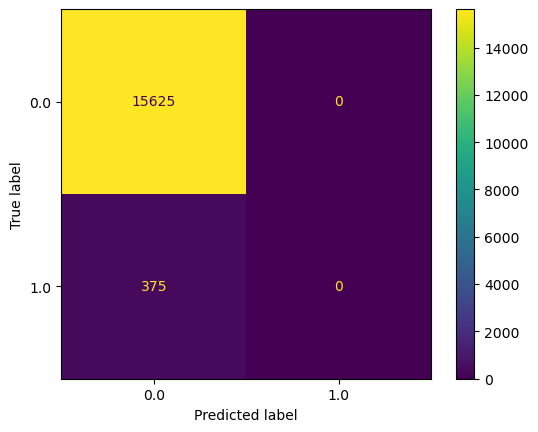

In [ ]:
dummy_classifier_score = ConfusionMatrixDisplay.from_estimator(dummy, X_test, y_test)

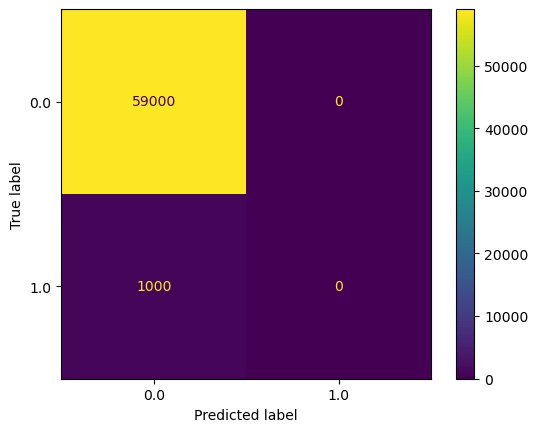

In [59]:
dummy_classifier_score = ConfusionMatrixDisplay.from_estimator(dummy, X_train, y_train)

In [68]:
dummy_class_report = classification_report(y_true= y_train,y_pred=dummy_pred, zero_division=0)

print(dummy_class_report)

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     59000
         1.0       0.00      0.00      0.00      1000

    accuracy                           0.98     60000
   macro avg       0.49      0.50      0.50     60000
weighted avg       0.97      0.98      0.98     60000

